# Markov Chain By Examples

[Edward Lu](https://github.com/edwardlu71/notebooks)

[__Markov chain__](https://en.wikipedia.org/wiki/Markov_chain): a stochastic model describing a sequence of possible events in which the probability of each event _depends only_ on the state attained in the previous event. <br>
__Markov processes__: the same concept but in continuous time. <br>
[__Markov matrix__](https://en.wikipedia.org/wiki/Stochastic_matrix): a square matrix used to describe the transitions of a Markov chain <br>
__Transitions__:    The changes of state of the system are called transitions<br>
__Stationary Distributions__: a probability distribution that remains unchanged in the Markov chain as time progresses

## Population Problem

In the first year, the populations in city and in countryside are at percentage of 20% and 80%. Every year 5% of city residents move to countryside, and 10% of people move from countryside to city. Please give the distribution of the population on Nth year.

In [1]:
from sympy import *

In [2]:
P = Matrix([[0.95, 0.05],[0.1, 0.9]]); P

Matrix([
[0.95, 0.05],
[ 0.1,  0.9]])

In [3]:
first_year = Matrix([0.2, 0.8]).T; first_year

Matrix([[0.2, 0.8]])

In [4]:
year_2 = first_year @ P; year_2

Matrix([[0.27, 0.73]])

In [5]:
year_10 = first_year @ P**(10-1); year_10

Matrix([[0.558578758401172, 0.441421241598828]])

In [6]:
year_100 = first_year @ P**(100-1); year_100  # Stationary Distribution

Matrix([[0.666666618640222, 0.333333381359776]])

## Prime Number Problem

To enter the main session of a computer game, the player has to press any key consecutively in prelude. Each key stroke rsults in displaying 1 or 2 or 3 or 4 with equal probability. It goes on until the sum of two consecutively displayed numbers is a prime number. However the player can only enter the main session if the prelude ends with 1 being displayed at the end. What's the probability of the player getting an entry ticket?

**the description is a bit confusing. You will see what the author mean "the probability" in the monte carlo simulation below**

In [7]:
import itertools
from math import factorial
import random

def keystroke():
    return random.choice(range(1,5))

def is_prime(x):
    return factorial(x - 1)  % x == x - 1

# this function calcualte the expected times of keystoke to see the sum of two consective keystoke being prime number
def expected_trials_prime_consective_sum_of_two(samples):
    trials = []
    for _ in range(samples):
        a = keystroke()
        count = 1
        while True:
            b = keystroke()
            count += 1
            if is_prime(a+b):
                break
            a = b
        trials.append(count)
    return sum(trials)/len(trials)

# this function calcualte the expected times of keystoke to see the sum of two consective keystoke being prime number and last input is 1
def expected_trials_prime_consective_sum_of_two_ending_1(samples):
    trials = []
    for _ in range(samples):
        a = keystroke()
        count = 1
        while True:
            b = keystroke()
            count += 1
            if b==1 and is_prime(a+b):
                break
            a = b
        trials.append(count)
    return sum(trials)/len(trials)

# this function shows the calculation of what the author means. The "probability" means the ratio of the cases ending as 1 again all the trials with sum of two = prime number
# you don't know whether this ratio is convergent or not from simulation
def percentage_prime_consective_sum_of_two_ending_1(samples):
    total = 0
    total_1 = 0
    for _ in range(samples):
        a = keystroke()
        count = 1
        while True:
            b = keystroke()
            count += 1
            if is_prime(a+b):
                if b==1:
                    total += 1
                    total_1 += 1
                    #break
                else:
                    total += 1
                break
            a = b
    return total_1/total

In [8]:
expected_trials_prime_consective_sum_of_two_ending_1(100000)

6.66898

In [9]:
expected_trials_prime_consective_sum_of_two(1000000)

2.817425

In [10]:
percentage_prime_consective_sum_of_two_ending_1(1000000)

0.341523

#### Markov Chain Solution

In [11]:
# find all the combination of two consecutive keystokes that could sum up a prime number
r4 = range(1,5)
ketstrokes2 = list(itertools.product(r4, r4))
primes = [(i,j) for i, j in ketstrokes2 if is_prime(i+j)]; display(primes)
# and those ending with 1
primes_1 = [(i,j) for i, j in ketstrokes2 if is_prime(i+j) and j==1]; display(primes_1)

[(1, 1), (1, 2), (1, 4), (2, 1), (2, 3), (3, 2), (3, 4), (4, 1), (4, 3)]

[(1, 1), (2, 1), (4, 1)]

<div>
    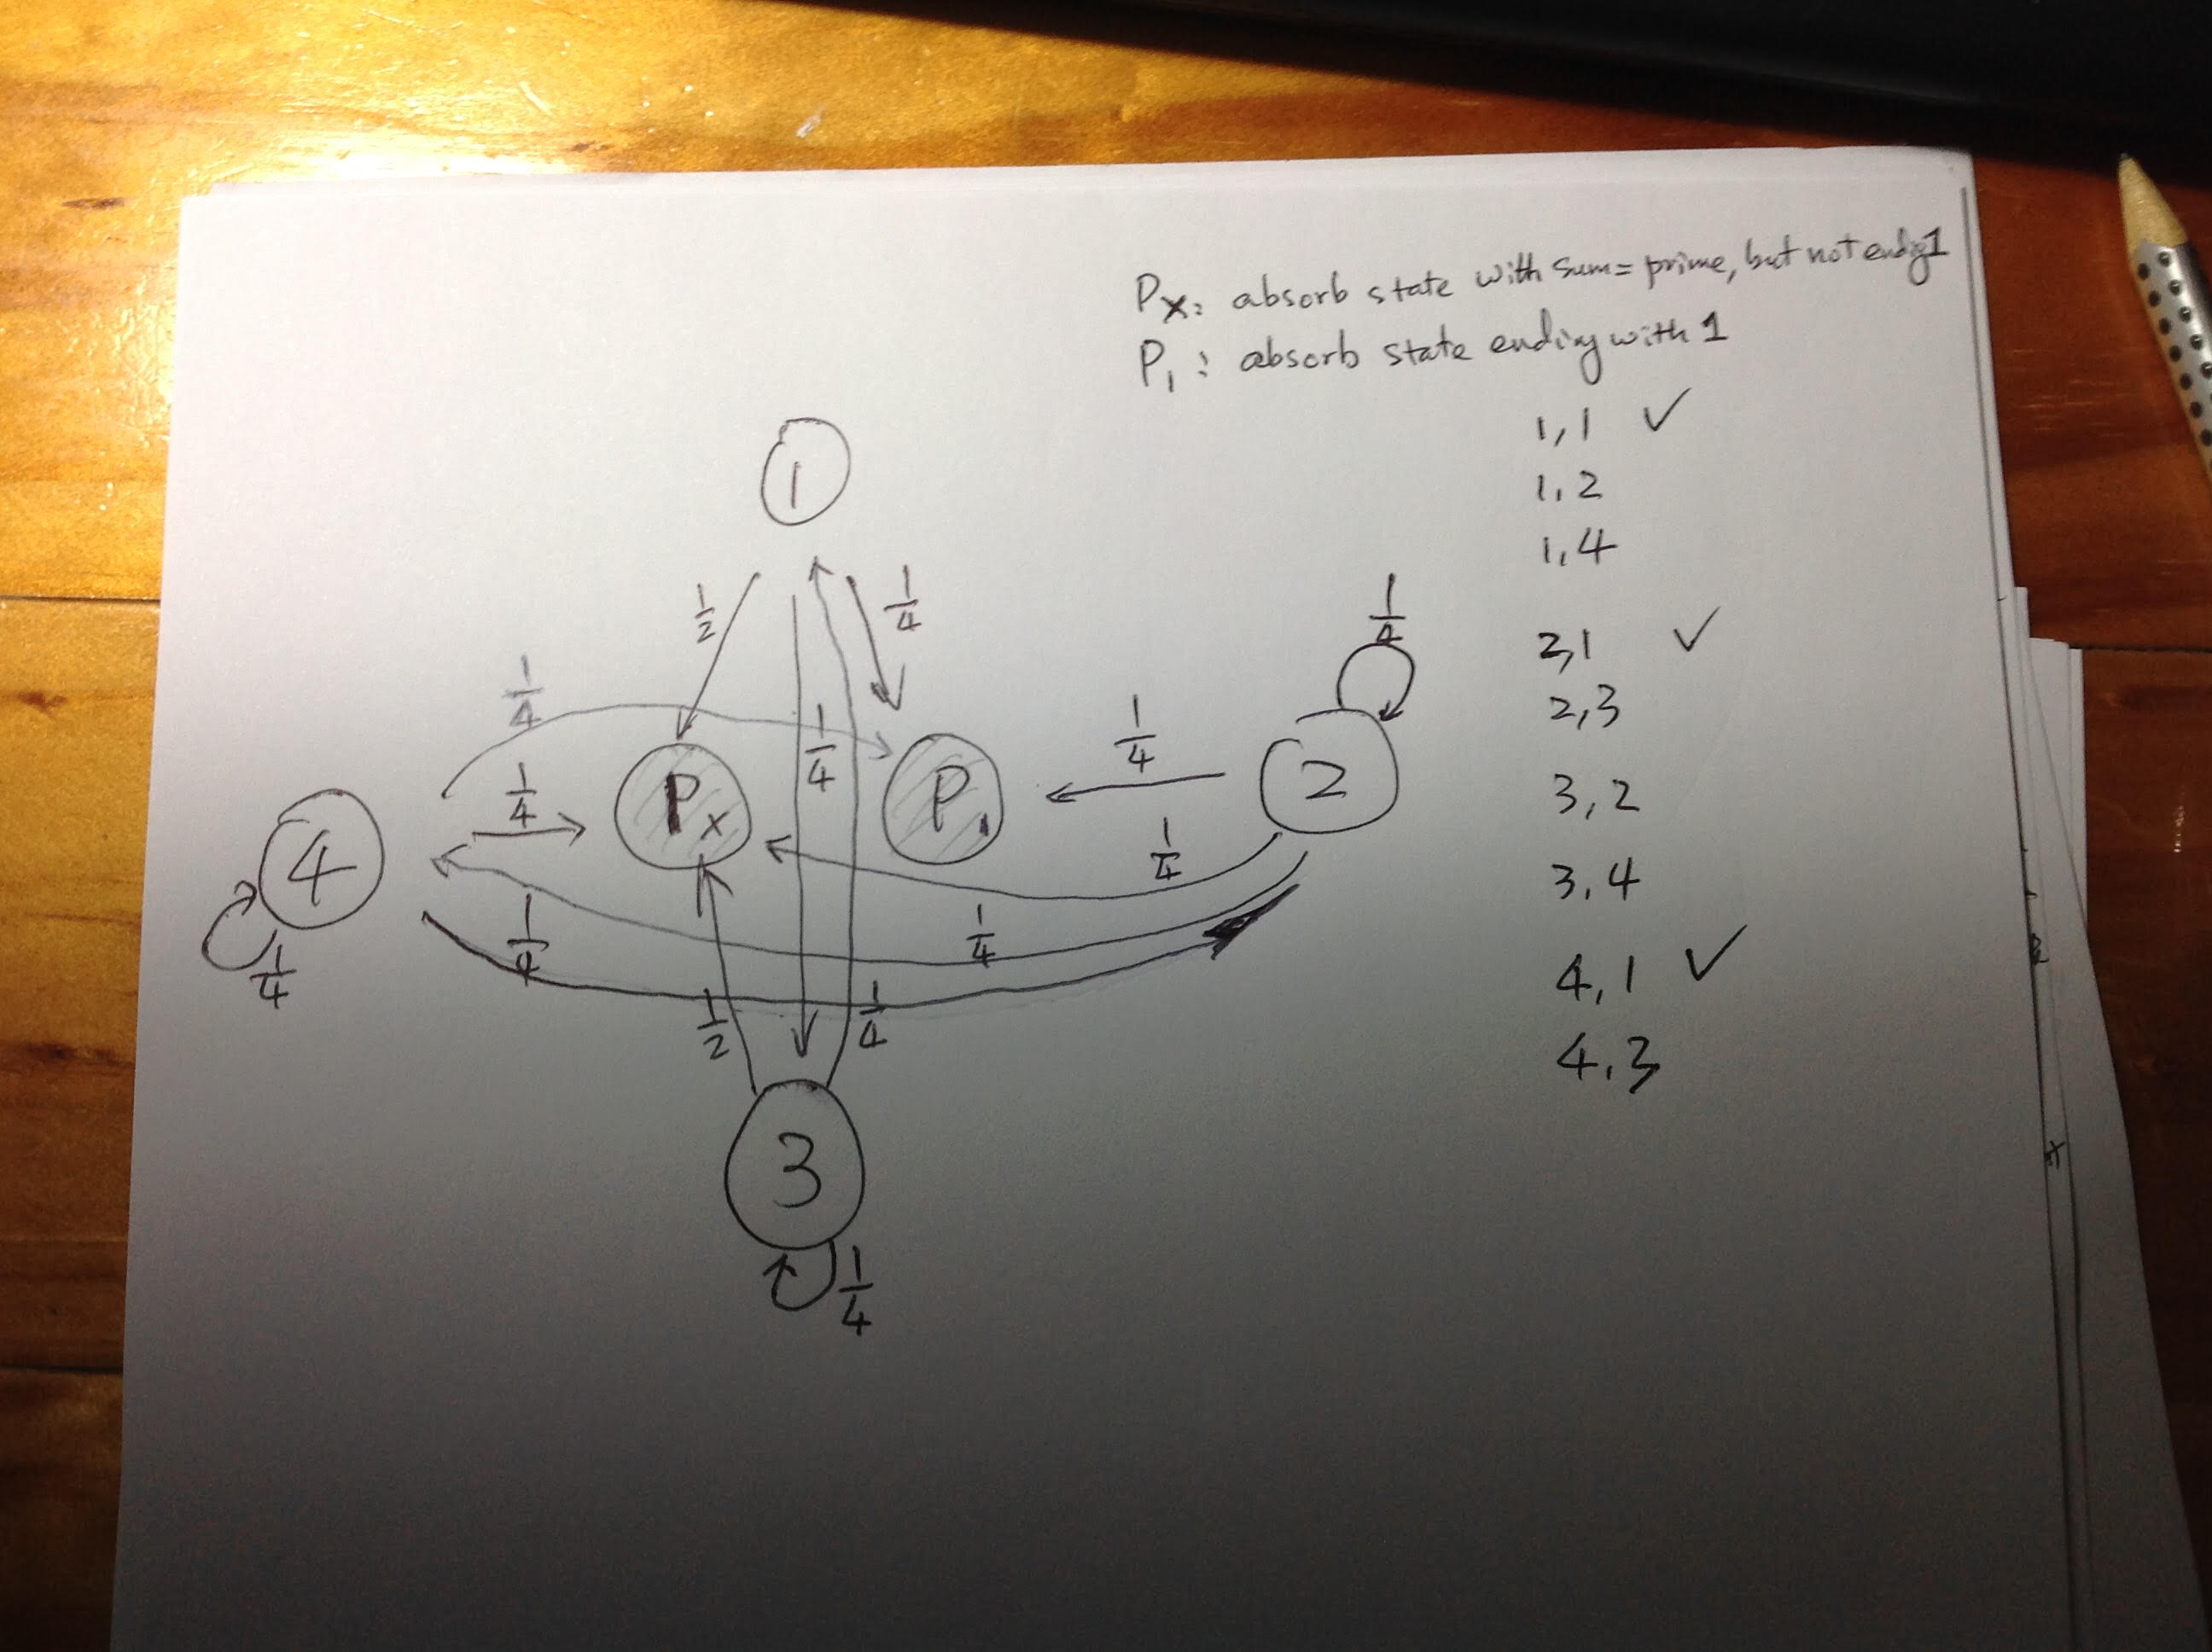
<div>

In [12]:
# based on the transition diagram I can construct the Markov transition matrix, with 6 states: 1,2,3,4 and Px,P1.
# Px is the absorbing state representing the situation sum of last two not ending with 1 is prime number, P1 is same as Px other than ending with 1
M = Matrix([[0,0,1/4,0,1/2,1/4],[0,1/4,0,1/4,1/4,1/4],[1/4,0,1/4,0,1/2,0],[0,1/4,0,1/4,1/4,1/4],[0,0,0,0,1,0],[0,0,0,0,0,1]]); M

Matrix([
[   0,    0, 0.25,    0,  0.5, 0.25],
[   0, 0.25,    0, 0.25, 0.25, 0.25],
[0.25,    0, 0.25,    0,  0.5,    0],
[   0, 0.25,    0, 0.25, 0.25, 0.25],
[   0,    0,    0,    0,    1,    0],
[   0,    0,    0,    0,    0,    1]])

In [13]:
# stationary distribution
T = M**100

In [14]:
states1234_prime_ending1 = (sum(T[:,5])-1)/4
states1234_prime_not_ending1 = (sum(T[:,4])-1)/4
# this "probability" the author wanted, in theory is
states1234_prime_ending1/(states1234_prime_ending1+states1234_prime_not_ending1)

0.340909090909091

#### Analytic Explanation of Expected times of

1. seeing a prime number
2. seeing a prime number with the last keystroke on 1

In [15]:
# seeing a prime number, based on submatrix Q of M with states "started" from 1,2,3,4, the average expected times is the sum of each row devided by 4, plus one (for the started)
Q_inv = (eye(4) - M[[0,1,2,3],[0,1,2,3]]).inv()
sum(Q_inv[:,:])/4+1

2.81818181818182

In [16]:
# the Markov transition matrix for scenario 2 is
M1 = Matrix([[0,1/4,1/4,1/4,1/4],[0,1/4,1/4,1/4,1/4],[1/4,1/4,1/4,1/4,0],[0,1/4,1/4,1/4,1/4],[0,0,0,0,1]]); 
# and the the expected times to see the event is
Q_inv = (eye(4) - M1[[0,1,2,3],[0,1,2,3]]).inv()
sum(Q_inv[:,:])/4+1

6.66666666666667

## Google Page Ranking
[__PageRank__](https://en.wikipedia.org/wiki/PageRank) is an algorithm used by Google Search to rank web pages. This example explained the mechanism how it works <br>

I dynamically create 

* **n** node graph to simulate the web pages
* the random number of directed edges to simulate the links from one page to others <br>

I also assume that the links on each page have equal chance to be clicked.

In [17]:
%matplotlib inline
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import random
import itertools
from IPython.display import display
init_printing()

In [18]:
n = 6              # simulate N pages
adj = 0            # adjustment
pages = range(n)   # use number to label pages 0..N-1

# these are for the simulation of the possible links. 
permutations_from_to = list(itertools.permutations(pages, 2))
number_of_permutations = len(permutations_from_to)
pairing_percent = 40/100    # randomly generate % of bidirect (from, to) pairs
number_of_pairs = round(number_of_permutations * pairing_percent)

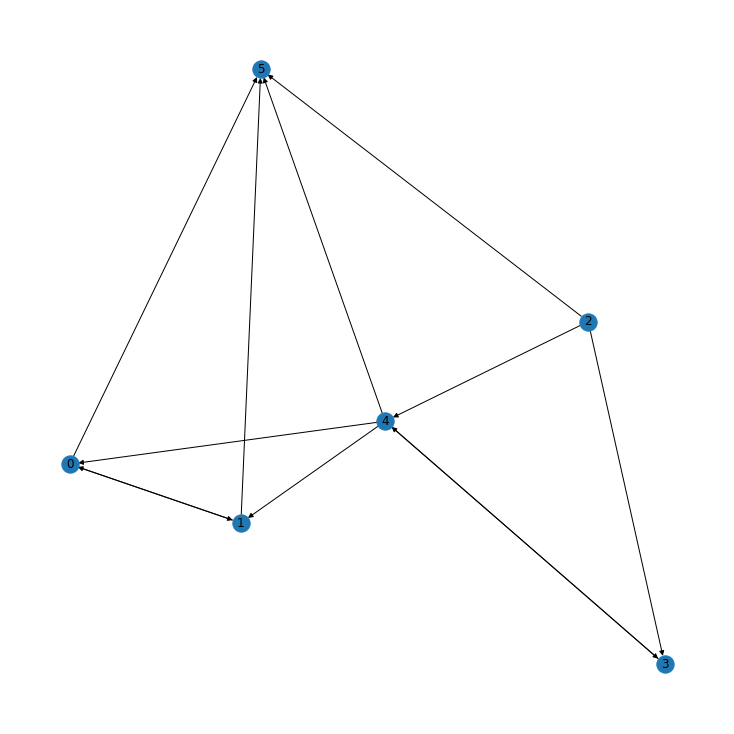

In [19]:
# create a graph with each page as a node and random edges to simulate the links
G = nx.MultiDiGraph()
G.add_nodes_from(pages)    # generate a graph with
samples = random.sample(permutations_from_to, k=number_of_pairs)  # pick samples from all possible permutations
G.add_edges_from(samples)
plt.rcParams["figure.figsize"] = (10,10)
nx.draw(G, pos=nx.spring_layout(G), with_labels=True)
plt.show()

In [20]:
# count how many linkes on a page
weights = [sum(1 for _ in G.neighbors(i)) for i in pages]; weights

In [21]:
# create Markov transition matrix
m = np.zeros((n, n))
for i in G.nodes():
    for j in G.neighbors(i):
        m[i][j] = 1/weights[i]
m_adj = m * (1-adj) + np.full((n,n), 1/n) * adj
M = Matrix(m_adj); display(M)

⎡0.0   0.5   0.0         0.0                0.0                0.5       ⎤
⎢                                                                        ⎥
⎢0.5   0.0   0.0         0.0                0.0                0.5       ⎥
⎢                                                                        ⎥
⎢0.0   0.0   0.0  0.333333333333333  0.333333333333333  0.333333333333333⎥
⎢                                                                        ⎥
⎢0.0   0.0   0.0         0.0                1.0                0.0       ⎥
⎢                                                                        ⎥
⎢0.25  0.25  0.0        0.25                0.0               0.25       ⎥
⎢                                                                        ⎥
⎣0.0   0.0   0.0         0.0                0.0                0.0       ⎦

### Matrix M
M is the Markov matrix for the transition to simulate the stochastic process a user randomly browsing from one page to another following the links. Here we assume that each link in the page has same chance to be clicked <br>
Be aware the google formula introduced a dumping factor, the meaning you can find in wiki link. In this simple example I set it to zero (adj=0). According to Google's research damping factor is usually set to 0.85<br>
Dot product the matrix multiple times to find the so-called Stationary Distributions

In [22]:
A = M**100; A

⎡7.88860905221012e-31           0            0           0                    
⎢                                                                             
⎢         0            7.88860905221012e-31  0           0                    
⎢                                                                             
⎢3.89171379909032e-29  3.89171379909032e-29  0  2.62953635073671e-31  1.051814
⎢                                                                             
⎢3.94430452610506e-29  3.94430452610506e-29  0  7.88860905221012e-31          
⎢                                                                             
⎢1.97215226305253e-29  1.97215226305253e-29  0           0            7.888609
⎢                                                                             
⎣         0                     0            0           0                    

 0            7.88860905221012e-31⎤
                                  ⎥
 0            7.88860905221012e-31⎥
                      

In [23]:
ranking = list(A.row(0))
ranking_pages = np.argsort(ranking); display(ranking_pages)   # sorted from low to high, the page id

array([1, 2, 3, 4, 0, 5])

#### verify

In [24]:
[print(a) for a in G.adjacency()]

(0, {1: {0: {}}, 5: {0: {}}})
(1, {5: {0: {}}, 0: {0: {}}})
(2, {3: {0: {}}, 5: {0: {}}, 4: {0: {}}})
(3, {4: {0: {}}})
(4, {3: {0: {}}, 1: {0: {}}, 0: {0: {}}, 5: {0: {}}})
(5, {})


[None, None, None, None, None, None]

In [25]:
print(samples)

[(2, 3), (3, 4), (1, 5), (2, 5), (1, 0), (0, 1), (4, 3), (0, 5), (4, 1), (2, 4), (4, 0), (4, 5)]


In [26]:
sorted(samples, key=lambda t: t[1])